In [1]:
car_img_path = "/content/car1.jpeg"

Machine Learning - numpy, pandas, scikit learn, seaborn/matplotlib

Deep Learning - tensorflow, keras, pytorch, opencv, nltk, gensim, spacy

In [88]:
#!pip list

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2#opencv

In [3]:
img = cv2.imread(car_img_path)

In [4]:
img.shape

(168, 300, 3)

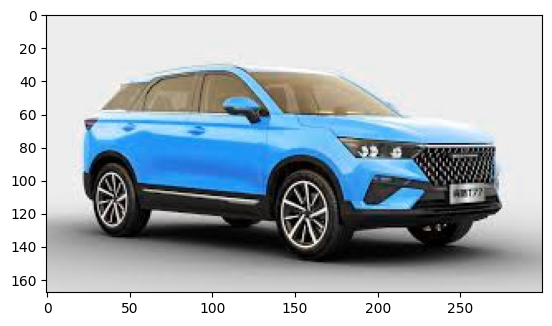

In [5]:
plt.imshow(img)

In [6]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [7]:
img2.shape

(168, 300, 3)

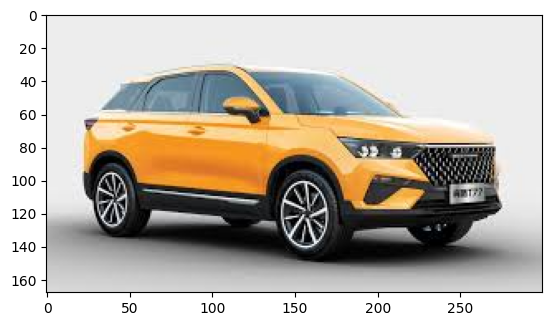

In [8]:
plt.imshow(img2)

In [9]:
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
img3.shape

(168, 300)

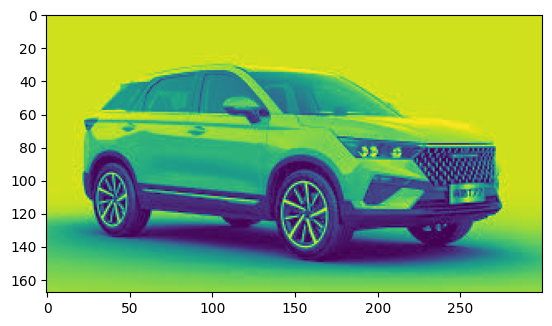

In [11]:
plt.imshow(img3)

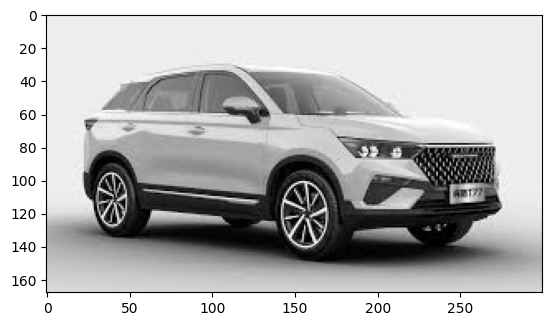

In [12]:
plt.imshow(img3, cmap='gray')

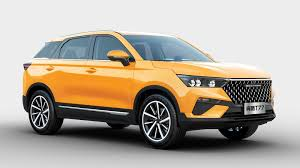

In [13]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [14]:
img3.shape

(168, 300)

In [15]:
row, col = img3.shape

In [16]:
car = img3.reshape(1,row,col,1)#(no of img, dim_row, dim_col, channel)

In [17]:
car.shape

(1, 168, 300, 1)

In [18]:
Conv_layer=[tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=car.shape[1:]
)]

In [19]:
conv_model=tf.keras.Sequential(Conv_layer)

In [20]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
Conv_layer1=[tf.keras.layers.Conv2D(
    filters=2,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=car.shape[1:]
)]

In [22]:
conv_model1=tf.keras.Sequential(Conv_layer1)

In [23]:
conv_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 2)       20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


TypeError: Invalid shape (1, 168, 300, 1) for image data

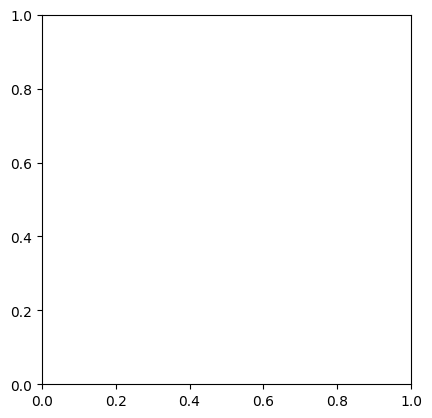

In [111]:
plt.imshow(car, cmap='gray')

In [24]:
output=conv_model.predict(car)

1/1 [==============================] - 1s 1s/step


In [25]:
output.shape

(1, 166, 298, 1)

In [26]:
((168+0-3)//1)+1

166

In [27]:
ro,co=output.shape[1:-1]

In [28]:
ro,co

(166, 298)

In [29]:
reshape_op = output.reshape(ro,co)

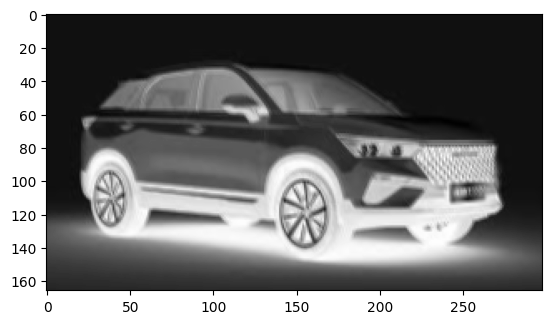

In [30]:
plt.imshow(reshape_op, cmap='gray')

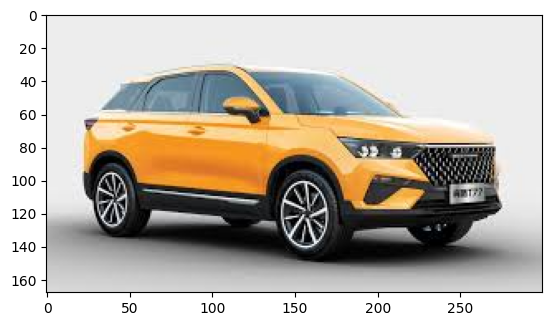

In [31]:
plt.imshow(img2)

In [32]:
img2.shape

(168, 300, 3)

In [34]:
row,col,dept=img2.shape

In [35]:
row,col,dept

(168, 300, 3)

In [36]:
color_car = img2

In [37]:
reshape_color_img=color_car.reshape(1,row,col,dept)

In [40]:
CONV_LAYER=[tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=reshape_color_img.shape[1:]
)]

In [41]:
conv_model=tf.keras.Sequential(CONV_LAYER)

In [42]:
conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
color_op=conv_model.predict(reshape_color_img)

1/1 [==============================] - 0s 136ms/step


In [44]:
color_op.shape

(1, 166, 298, 1)

In [45]:
row, col=color_op.shape[1:-1]

In [46]:
reshape_op=color_op.reshape(row,col)

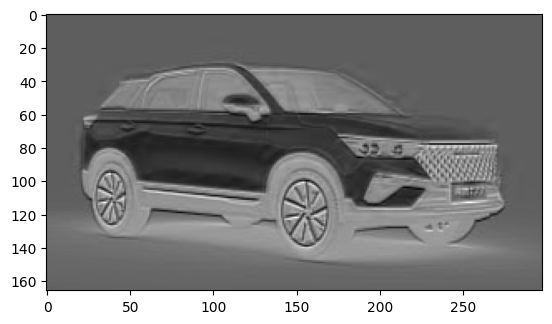

In [48]:
plt.imshow(reshape_op,cmap='gray')

In [49]:
color_car.shape

(168, 300, 3)

In [50]:
def reshaping_in(img,grayscale=True):
  if grayscale:
    row,col=img.shape
    img=img.reshape(1,row,col,1) #grayscale
    return img
  row,col,depth=img.shape
  color_img=img.reshape(1,row,col,depth) #colored
  return color_img

In [51]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img,grayscale=False)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
  result = pooling_layer(reshaped_img)
  return result

In [52]:
result=max_pooling(color_car)

In [53]:
result.shape

TensorShape([1, 84, 150, 3])

In [58]:
def plot(result):
  _,row,col,_=result.shape
  reshape_img=tf.reshape(result,(row,col,3))
  plt.imshow(reshape_img)

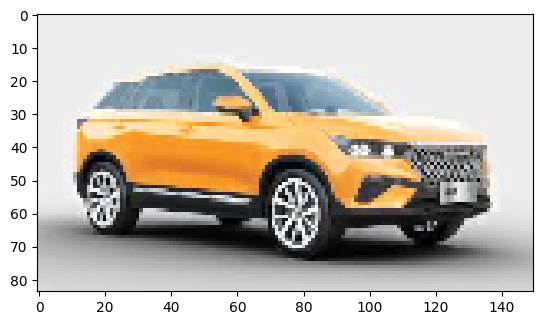

In [59]:
plot(result)

In [ ]:
#min,avg,globalpooling

In [66]:
def get_conv_model(filters=1,filter_size=(3,3),strides=(1,1),input_shape=None,padding='valid'):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters,
                                       kernel_size=filter_size,
                                       strides=strides,
                                       input_shape=input_shape,
                                       padding=padding)]
  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [67]:
def apply_conv_model_and_visualize(img,conv_model):
  try:
    out=conv_model.predict(img)
    print(out.shape)
    row,col,depth=out.shape[1:]
    reshape_out=out.reshape(row,col,depth)

    for d in range(depth):
      plt.imshow(reshape_out[:,:,d],cmap='gray')
      plt.show()
  except Exception as e:
    raise e

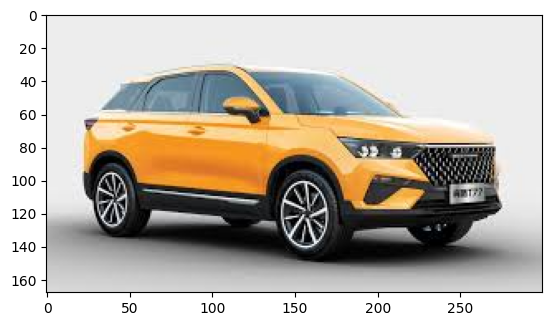

In [63]:
plt.imshow(color_car)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 88ms/step
(1, 166, 298, 10)


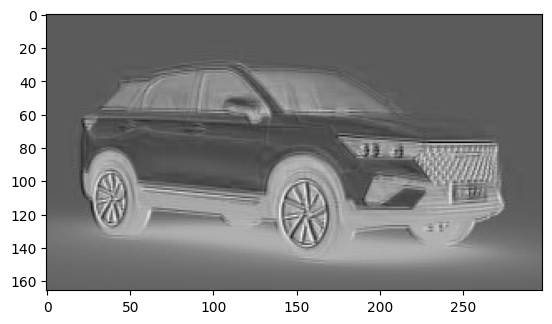

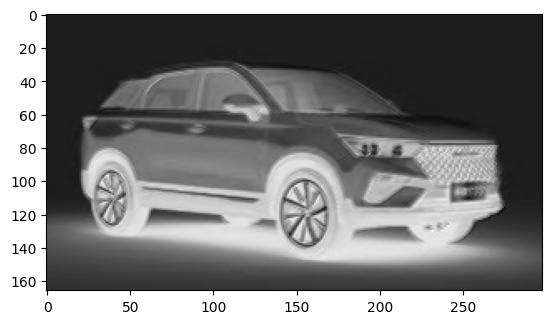

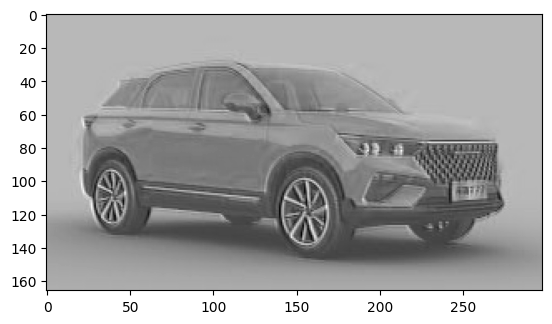

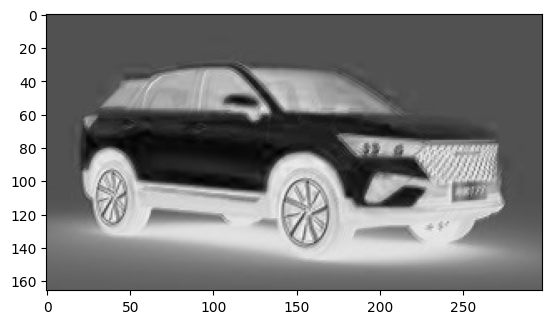

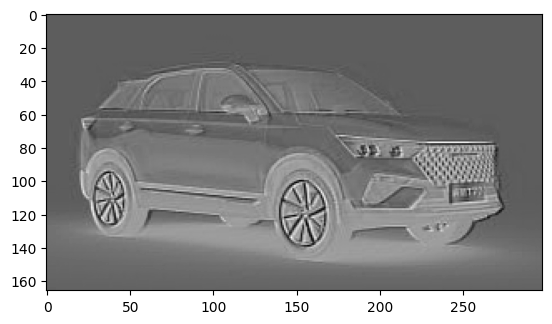

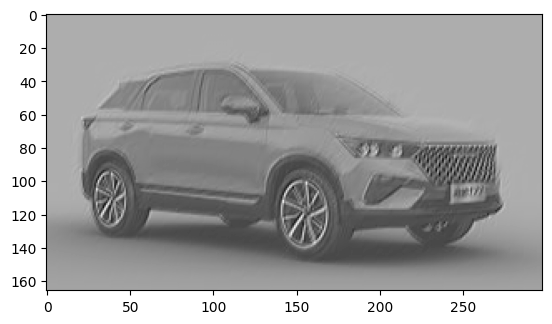

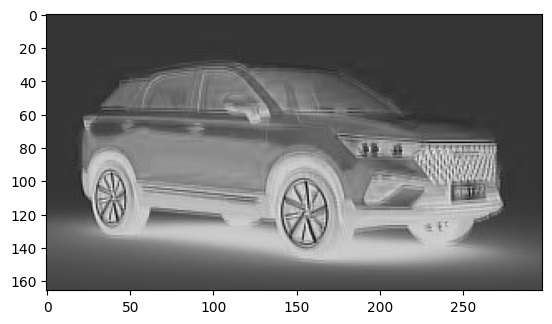

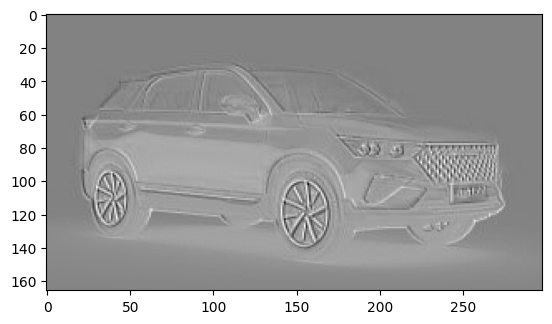

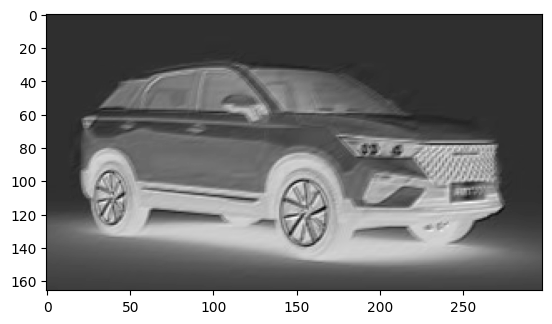

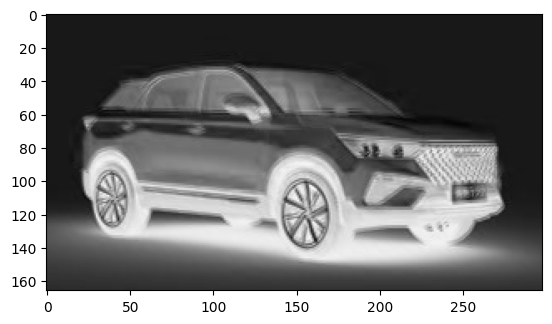

In [68]:
inp_img=reshaping_in(color_car,grayscale=False)
model=get_conv_model(filters=10,filter_size=(3,3),strides=(1,1),input_shape=inp_img.shape[1:])
apply_conv_model_and_visualize(inp_img,model)

In [87]:
!mkdir -p ~/ .kaggle

In [88]:
!cp kaggle.json ~/.kaggle/

cp: failed to access '/root/.kaggle/': Not a directory


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [89]:
!kaggle datasets download -d salader/dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [76]:
!pwd

/content
